## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import californiaDataset
import network
import dataset
import sanityChecks
import performanceMetrics
import torch 
from torch.utils.data import random_split 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split

## Parameters 

In [3]:
variance = 1

In [4]:
# Parameters
variance = 0.01


## Dataset - Boston Housing 

In [5]:
#Parameters 
n_features = 8
n_samples= 20640
n_target = 1 

In [6]:
X,Y = californiaDataset.california_data()

       X1    X2        X3        X4      X5        X6     X7      X8      Y
0  8.3252  41.0  6.984127  1.023810   322.0  2.555556  37.88 -122.23  4.526
1  8.3014  21.0  6.238137  0.971880  2401.0  2.109842  37.86 -122.22  3.585
2  7.2574  52.0  8.288136  1.073446   496.0  2.802260  37.85 -122.24  3.521
3  5.6431  52.0  5.817352  1.073059   558.0  2.547945  37.85 -122.25  3.413
4  3.8462  52.0  6.281853  1.081081   565.0  2.181467  37.85 -122.25  3.422


In [7]:
#Train test split for dataset 
real_dataset = dataset.CustomDataset(X,Y)
train_size = round(0.8 * n_samples)
test_size = n_samples - train_size
train_data, test_data = random_split(real_dataset,[train_size,test_size])

## Training Parameters 

In [8]:
batch_size = 5000
n_epochs = 100
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model 
prior_model = ctb.CatBoostRegressor()
prior_model.fit(X,Y)

Learning rate set to 0.066055


0:	learn: 0.9629179	total: 49.3ms	remaining: 49.3s
1:	learn: 0.9301086	total: 51.5ms	remaining: 25.7s
2:	learn: 0.9005637	total: 53.4ms	remaining: 17.8s
3:	learn: 0.8720983	total: 55.5ms	remaining: 13.8s
4:	learn: 0.8467410	total: 57.4ms	remaining: 11.4s
5:	learn: 0.8226672	total: 59.3ms	remaining: 9.82s
6:	learn: 0.7994702	total: 61.2ms	remaining: 8.68s
7:	learn: 0.7784272	total: 63.2ms	remaining: 7.83s
8:	learn: 0.7602192	total: 65.1ms	remaining: 7.17s
9:	learn: 0.7412421	total: 67ms	remaining: 6.63s
10:	learn: 0.7247930	total: 68.9ms	remaining: 6.2s
11:	learn: 0.7089951	total: 70.7ms	remaining: 5.82s
12:	learn: 0.6951345	total: 72.6ms	remaining: 5.51s
13:	learn: 0.6809276	total: 74.5ms	remaining: 5.24s
14:	learn: 0.6692630	total: 76.3ms	remaining: 5.01s
15:	learn: 0.6588323	total: 78.3ms	remaining: 4.82s
16:	learn: 0.6472700	total: 80.2ms	remaining: 4.63s
17:	learn: 0.6379982	total: 82.1ms	remaining: 4.48s
18:	learn: 0.6294674	total: 84.1ms	remaining: 4.34s
19:	learn: 0.6193295	tota

59:	learn: 0.4824455	total: 166ms	remaining: 2.6s
60:	learn: 0.4809744	total: 168ms	remaining: 2.59s
61:	learn: 0.4801376	total: 170ms	remaining: 2.58s
62:	learn: 0.4792422	total: 172ms	remaining: 2.56s
63:	learn: 0.4780719	total: 174ms	remaining: 2.55s
64:	learn: 0.4771984	total: 176ms	remaining: 2.53s
65:	learn: 0.4759610	total: 178ms	remaining: 2.52s
66:	learn: 0.4750287	total: 180ms	remaining: 2.5s
67:	learn: 0.4740093	total: 181ms	remaining: 2.49s
68:	learn: 0.4732612	total: 183ms	remaining: 2.47s
69:	learn: 0.4727266	total: 185ms	remaining: 2.46s
70:	learn: 0.4716549	total: 187ms	remaining: 2.45s
71:	learn: 0.4709088	total: 189ms	remaining: 2.44s
72:	learn: 0.4697594	total: 191ms	remaining: 2.43s
73:	learn: 0.4690934	total: 193ms	remaining: 2.42s
74:	learn: 0.4680942	total: 195ms	remaining: 2.4s
75:	learn: 0.4672726	total: 197ms	remaining: 2.39s
76:	learn: 0.4664479	total: 199ms	remaining: 2.38s
77:	learn: 0.4656044	total: 201ms	remaining: 2.37s
78:	learn: 0.4645375	total: 203ms	

84:	learn: 0.4596603	total: 215ms	remaining: 2.31s
85:	learn: 0.4587835	total: 217ms	remaining: 2.3s
86:	learn: 0.4583577	total: 219ms	remaining: 2.29s
87:	learn: 0.4577999	total: 221ms	remaining: 2.29s
88:	learn: 0.4572657	total: 222ms	remaining: 2.28s
89:	learn: 0.4569360	total: 224ms	remaining: 2.27s
90:	learn: 0.4559969	total: 226ms	remaining: 2.26s
91:	learn: 0.4549716	total: 228ms	remaining: 2.25s
92:	learn: 0.4544919	total: 230ms	remaining: 2.24s
93:	learn: 0.4537693	total: 232ms	remaining: 2.23s
94:	learn: 0.4532673	total: 234ms	remaining: 2.23s
95:	learn: 0.4526987	total: 236ms	remaining: 2.22s
96:	learn: 0.4520952	total: 238ms	remaining: 2.21s
97:	learn: 0.4513919	total: 240ms	remaining: 2.21s
98:	learn: 0.4503747	total: 242ms	remaining: 2.2s
99:	learn: 0.4494783	total: 244ms	remaining: 2.19s
100:	learn: 0.4487329	total: 245ms	remaining: 2.18s
101:	learn: 0.4481325	total: 247ms	remaining: 2.18s
102:	learn: 0.4475445	total: 249ms	remaining: 2.17s
103:	learn: 0.4466014	total: 2

144:	learn: 0.4274087	total: 330ms	remaining: 1.94s
145:	learn: 0.4271984	total: 332ms	remaining: 1.94s
146:	learn: 0.4268458	total: 334ms	remaining: 1.94s
147:	learn: 0.4264987	total: 336ms	remaining: 1.93s
148:	learn: 0.4262192	total: 338ms	remaining: 1.93s
149:	learn: 0.4257966	total: 339ms	remaining: 1.92s
150:	learn: 0.4253062	total: 341ms	remaining: 1.92s
151:	learn: 0.4247446	total: 343ms	remaining: 1.91s
152:	learn: 0.4237365	total: 345ms	remaining: 1.91s
153:	learn: 0.4233079	total: 347ms	remaining: 1.91s
154:	learn: 0.4228876	total: 349ms	remaining: 1.9s
155:	learn: 0.4225404	total: 351ms	remaining: 1.9s
156:	learn: 0.4222831	total: 353ms	remaining: 1.89s
157:	learn: 0.4218088	total: 355ms	remaining: 1.89s
158:	learn: 0.4213239	total: 357ms	remaining: 1.89s
159:	learn: 0.4210022	total: 359ms	remaining: 1.88s
160:	learn: 0.4201256	total: 361ms	remaining: 1.88s
161:	learn: 0.4197073	total: 363ms	remaining: 1.88s
162:	learn: 0.4192052	total: 365ms	remaining: 1.87s
163:	learn: 0.

169:	learn: 0.4165960	total: 378ms	remaining: 1.85s
170:	learn: 0.4161870	total: 381ms	remaining: 1.84s
171:	learn: 0.4156228	total: 382ms	remaining: 1.84s
172:	learn: 0.4153041	total: 384ms	remaining: 1.84s
173:	learn: 0.4148857	total: 386ms	remaining: 1.83s
174:	learn: 0.4144190	total: 388ms	remaining: 1.83s
175:	learn: 0.4140875	total: 390ms	remaining: 1.82s
176:	learn: 0.4136755	total: 392ms	remaining: 1.82s
177:	learn: 0.4133860	total: 394ms	remaining: 1.82s
178:	learn: 0.4129780	total: 396ms	remaining: 1.81s
179:	learn: 0.4122907	total: 398ms	remaining: 1.81s
180:	learn: 0.4119188	total: 399ms	remaining: 1.81s
181:	learn: 0.4115412	total: 401ms	remaining: 1.8s
182:	learn: 0.4112620	total: 403ms	remaining: 1.8s
183:	learn: 0.4107734	total: 405ms	remaining: 1.8s
184:	learn: 0.4104881	total: 407ms	remaining: 1.79s
185:	learn: 0.4100009	total: 409ms	remaining: 1.79s
186:	learn: 0.4096453	total: 411ms	remaining: 1.78s
187:	learn: 0.4093395	total: 413ms	remaining: 1.78s
188:	learn: 0.4

228:	learn: 0.3963073	total: 494ms	remaining: 1.66s
229:	learn: 0.3960925	total: 496ms	remaining: 1.66s
230:	learn: 0.3957018	total: 498ms	remaining: 1.66s
231:	learn: 0.3954162	total: 500ms	remaining: 1.66s
232:	learn: 0.3951665	total: 502ms	remaining: 1.65s
233:	learn: 0.3949269	total: 504ms	remaining: 1.65s
234:	learn: 0.3945894	total: 506ms	remaining: 1.65s
235:	learn: 0.3944181	total: 508ms	remaining: 1.64s
236:	learn: 0.3941497	total: 510ms	remaining: 1.64s
237:	learn: 0.3939819	total: 512ms	remaining: 1.64s
238:	learn: 0.3938322	total: 514ms	remaining: 1.64s
239:	learn: 0.3935463	total: 516ms	remaining: 1.63s
240:	learn: 0.3933166	total: 518ms	remaining: 1.63s
241:	learn: 0.3930992	total: 520ms	remaining: 1.63s
242:	learn: 0.3928898	total: 522ms	remaining: 1.63s
243:	learn: 0.3926199	total: 524ms	remaining: 1.62s
244:	learn: 0.3923955	total: 526ms	remaining: 1.62s
245:	learn: 0.3922312	total: 528ms	remaining: 1.62s
246:	learn: 0.3919499	total: 530ms	remaining: 1.61s
247:	learn: 

253:	learn: 0.3900274	total: 544ms	remaining: 1.6s
254:	learn: 0.3898171	total: 546ms	remaining: 1.59s
255:	learn: 0.3896180	total: 548ms	remaining: 1.59s
256:	learn: 0.3894251	total: 550ms	remaining: 1.59s
257:	learn: 0.3892139	total: 552ms	remaining: 1.59s
258:	learn: 0.3889352	total: 554ms	remaining: 1.58s
259:	learn: 0.3886531	total: 556ms	remaining: 1.58s
260:	learn: 0.3884539	total: 558ms	remaining: 1.58s
261:	learn: 0.3882459	total: 560ms	remaining: 1.58s
262:	learn: 0.3881101	total: 562ms	remaining: 1.57s
263:	learn: 0.3879324	total: 564ms	remaining: 1.57s
264:	learn: 0.3876861	total: 565ms	remaining: 1.57s
265:	learn: 0.3874255	total: 567ms	remaining: 1.56s
266:	learn: 0.3868515	total: 569ms	remaining: 1.56s
267:	learn: 0.3866114	total: 571ms	remaining: 1.56s
268:	learn: 0.3863119	total: 573ms	remaining: 1.56s
269:	learn: 0.3860579	total: 576ms	remaining: 1.56s
270:	learn: 0.3858830	total: 577ms	remaining: 1.55s
271:	learn: 0.3857050	total: 579ms	remaining: 1.55s
272:	learn: 0

313:	learn: 0.3771184	total: 660ms	remaining: 1.44s
314:	learn: 0.3769370	total: 662ms	remaining: 1.44s
315:	learn: 0.3766643	total: 664ms	remaining: 1.44s
316:	learn: 0.3764891	total: 666ms	remaining: 1.44s
317:	learn: 0.3762751	total: 668ms	remaining: 1.43s
318:	learn: 0.3761284	total: 670ms	remaining: 1.43s
319:	learn: 0.3760168	total: 672ms	remaining: 1.43s
320:	learn: 0.3757763	total: 674ms	remaining: 1.43s
321:	learn: 0.3756076	total: 676ms	remaining: 1.42s
322:	learn: 0.3754123	total: 678ms	remaining: 1.42s
323:	learn: 0.3751852	total: 681ms	remaining: 1.42s
324:	learn: 0.3750004	total: 683ms	remaining: 1.42s
325:	learn: 0.3749086	total: 685ms	remaining: 1.42s
326:	learn: 0.3746654	total: 687ms	remaining: 1.41s
327:	learn: 0.3745405	total: 690ms	remaining: 1.41s
328:	learn: 0.3743710	total: 692ms	remaining: 1.41s
329:	learn: 0.3741679	total: 694ms	remaining: 1.41s
330:	learn: 0.3738646	total: 696ms	remaining: 1.41s
331:	learn: 0.3736647	total: 699ms	remaining: 1.41s
332:	learn: 

336:	learn: 0.3727111	total: 709ms	remaining: 1.4s
337:	learn: 0.3724765	total: 711ms	remaining: 1.39s
338:	learn: 0.3722959	total: 714ms	remaining: 1.39s
339:	learn: 0.3720213	total: 716ms	remaining: 1.39s
340:	learn: 0.3718316	total: 718ms	remaining: 1.39s
341:	learn: 0.3716519	total: 720ms	remaining: 1.38s
342:	learn: 0.3714592	total: 722ms	remaining: 1.38s
343:	learn: 0.3713389	total: 724ms	remaining: 1.38s
344:	learn: 0.3711642	total: 727ms	remaining: 1.38s
345:	learn: 0.3709569	total: 729ms	remaining: 1.38s
346:	learn: 0.3708184	total: 731ms	remaining: 1.38s
347:	learn: 0.3705958	total: 733ms	remaining: 1.37s
348:	learn: 0.3703798	total: 735ms	remaining: 1.37s
349:	learn: 0.3701923	total: 737ms	remaining: 1.37s
350:	learn: 0.3700067	total: 739ms	remaining: 1.37s
351:	learn: 0.3698930	total: 741ms	remaining: 1.36s
352:	learn: 0.3697314	total: 744ms	remaining: 1.36s
353:	learn: 0.3695617	total: 746ms	remaining: 1.36s
354:	learn: 0.3694397	total: 748ms	remaining: 1.36s
355:	learn: 0

390:	learn: 0.3637044	total: 824ms	remaining: 1.28s
391:	learn: 0.3636336	total: 826ms	remaining: 1.28s
392:	learn: 0.3635003	total: 829ms	remaining: 1.28s
393:	learn: 0.3633029	total: 831ms	remaining: 1.28s
394:	learn: 0.3632136	total: 833ms	remaining: 1.28s
395:	learn: 0.3629529	total: 835ms	remaining: 1.27s
396:	learn: 0.3627743	total: 837ms	remaining: 1.27s
397:	learn: 0.3626747	total: 839ms	remaining: 1.27s
398:	learn: 0.3625881	total: 841ms	remaining: 1.27s
399:	learn: 0.3622963	total: 843ms	remaining: 1.26s
400:	learn: 0.3622314	total: 845ms	remaining: 1.26s
401:	learn: 0.3620143	total: 847ms	remaining: 1.26s
402:	learn: 0.3618403	total: 849ms	remaining: 1.26s
403:	learn: 0.3616747	total: 851ms	remaining: 1.25s
404:	learn: 0.3614255	total: 853ms	remaining: 1.25s
405:	learn: 0.3613607	total: 855ms	remaining: 1.25s
406:	learn: 0.3612875	total: 857ms	remaining: 1.25s
407:	learn: 0.3611516	total: 859ms	remaining: 1.25s
408:	learn: 0.3609621	total: 861ms	remaining: 1.24s
409:	learn: 

414:	learn: 0.3597887	total: 874ms	remaining: 1.23s
415:	learn: 0.3595791	total: 876ms	remaining: 1.23s
416:	learn: 0.3594487	total: 878ms	remaining: 1.23s
417:	learn: 0.3592759	total: 880ms	remaining: 1.23s
418:	learn: 0.3591088	total: 882ms	remaining: 1.22s
419:	learn: 0.3589470	total: 884ms	remaining: 1.22s
420:	learn: 0.3587972	total: 886ms	remaining: 1.22s
421:	learn: 0.3586831	total: 888ms	remaining: 1.22s
422:	learn: 0.3585620	total: 890ms	remaining: 1.21s
423:	learn: 0.3584427	total: 892ms	remaining: 1.21s
424:	learn: 0.3583044	total: 894ms	remaining: 1.21s
425:	learn: 0.3581698	total: 896ms	remaining: 1.21s
426:	learn: 0.3580461	total: 898ms	remaining: 1.21s
427:	learn: 0.3579182	total: 900ms	remaining: 1.2s
428:	learn: 0.3577521	total: 902ms	remaining: 1.2s
429:	learn: 0.3576138	total: 904ms	remaining: 1.2s
430:	learn: 0.3575528	total: 906ms	remaining: 1.2s
431:	learn: 0.3574686	total: 908ms	remaining: 1.19s
432:	learn: 0.3572923	total: 910ms	remaining: 1.19s
433:	learn: 0.35

471:	learn: 0.3518082	total: 990ms	remaining: 1.11s
472:	learn: 0.3516593	total: 992ms	remaining: 1.1s
473:	learn: 0.3514906	total: 994ms	remaining: 1.1s
474:	learn: 0.3513843	total: 996ms	remaining: 1.1s
475:	learn: 0.3512406	total: 999ms	remaining: 1.1s
476:	learn: 0.3510044	total: 1s	remaining: 1.1s
477:	learn: 0.3509121	total: 1s	remaining: 1.09s
478:	learn: 0.3507270	total: 1s	remaining: 1.09s
479:	learn: 0.3506003	total: 1.01s	remaining: 1.09s
480:	learn: 0.3505111	total: 1.01s	remaining: 1.09s
481:	learn: 0.3503906	total: 1.01s	remaining: 1.08s
482:	learn: 0.3501522	total: 1.01s	remaining: 1.08s
483:	learn: 0.3500494	total: 1.01s	remaining: 1.08s
484:	learn: 0.3498921	total: 1.02s	remaining: 1.08s
485:	learn: 0.3497143	total: 1.02s	remaining: 1.08s
486:	learn: 0.3496172	total: 1.02s	remaining: 1.07s
487:	learn: 0.3494609	total: 1.02s	remaining: 1.07s
488:	learn: 0.3493200	total: 1.02s	remaining: 1.07s
489:	learn: 0.3491550	total: 1.03s	remaining: 1.07s
490:	learn: 0.3490323	tota

495:	learn: 0.3484072	total: 1.04s	remaining: 1.05s
496:	learn: 0.3482698	total: 1.04s	remaining: 1.05s
497:	learn: 0.3481630	total: 1.04s	remaining: 1.05s
498:	learn: 0.3480855	total: 1.04s	remaining: 1.05s
499:	learn: 0.3478655	total: 1.05s	remaining: 1.05s
500:	learn: 0.3477966	total: 1.05s	remaining: 1.04s
501:	learn: 0.3476142	total: 1.05s	remaining: 1.04s
502:	learn: 0.3474667	total: 1.05s	remaining: 1.04s
503:	learn: 0.3473844	total: 1.05s	remaining: 1.04s
504:	learn: 0.3471852	total: 1.06s	remaining: 1.04s
505:	learn: 0.3471124	total: 1.06s	remaining: 1.03s
506:	learn: 0.3469987	total: 1.06s	remaining: 1.03s
507:	learn: 0.3469000	total: 1.06s	remaining: 1.03s
508:	learn: 0.3467621	total: 1.06s	remaining: 1.03s
509:	learn: 0.3466653	total: 1.07s	remaining: 1.02s
510:	learn: 0.3465795	total: 1.07s	remaining: 1.02s
511:	learn: 0.3464899	total: 1.07s	remaining: 1.02s
512:	learn: 0.3463711	total: 1.07s	remaining: 1.02s
513:	learn: 0.3462483	total: 1.07s	remaining: 1.02s
514:	learn: 

552:	learn: 0.3410901	total: 1.16s	remaining: 935ms
553:	learn: 0.3409923	total: 1.16s	remaining: 932ms
554:	learn: 0.3408730	total: 1.16s	remaining: 930ms
555:	learn: 0.3408310	total: 1.16s	remaining: 928ms
556:	learn: 0.3407365	total: 1.16s	remaining: 926ms
557:	learn: 0.3406506	total: 1.17s	remaining: 924ms
558:	learn: 0.3405352	total: 1.17s	remaining: 922ms
559:	learn: 0.3404352	total: 1.17s	remaining: 919ms
560:	learn: 0.3403419	total: 1.17s	remaining: 917ms
561:	learn: 0.3402836	total: 1.17s	remaining: 915ms
562:	learn: 0.3402264	total: 1.18s	remaining: 913ms
563:	learn: 0.3400466	total: 1.18s	remaining: 911ms
564:	learn: 0.3399235	total: 1.18s	remaining: 909ms
565:	learn: 0.3398064	total: 1.18s	remaining: 907ms
566:	learn: 0.3396466	total: 1.18s	remaining: 904ms
567:	learn: 0.3395531	total: 1.19s	remaining: 902ms
568:	learn: 0.3394093	total: 1.19s	remaining: 900ms
569:	learn: 0.3393241	total: 1.19s	remaining: 898ms
570:	learn: 0.3392368	total: 1.19s	remaining: 896ms
571:	learn: 

576:	learn: 0.3386361	total: 1.21s	remaining: 884ms
577:	learn: 0.3385706	total: 1.21s	remaining: 882ms
578:	learn: 0.3384814	total: 1.21s	remaining: 880ms
579:	learn: 0.3383559	total: 1.21s	remaining: 878ms
580:	learn: 0.3382469	total: 1.21s	remaining: 876ms
581:	learn: 0.3381645	total: 1.22s	remaining: 873ms
582:	learn: 0.3380538	total: 1.22s	remaining: 871ms
583:	learn: 0.3379690	total: 1.22s	remaining: 869ms
584:	learn: 0.3378924	total: 1.22s	remaining: 867ms
585:	learn: 0.3378307	total: 1.22s	remaining: 865ms
586:	learn: 0.3377186	total: 1.23s	remaining: 863ms
587:	learn: 0.3376434	total: 1.23s	remaining: 861ms
588:	learn: 0.3375696	total: 1.23s	remaining: 859ms
589:	learn: 0.3374902	total: 1.23s	remaining: 856ms
590:	learn: 0.3373056	total: 1.23s	remaining: 854ms
591:	learn: 0.3371913	total: 1.24s	remaining: 852ms
592:	learn: 0.3371272	total: 1.24s	remaining: 850ms
593:	learn: 0.3370368	total: 1.24s	remaining: 848ms
594:	learn: 0.3368150	total: 1.24s	remaining: 846ms
595:	learn: 

633:	learn: 0.3328844	total: 1.32s	remaining: 764ms
634:	learn: 0.3328544	total: 1.32s	remaining: 761ms
635:	learn: 0.3327021	total: 1.33s	remaining: 759ms
636:	learn: 0.3326462	total: 1.33s	remaining: 757ms
637:	learn: 0.3325758	total: 1.33s	remaining: 755ms
638:	learn: 0.3324324	total: 1.33s	remaining: 753ms
639:	learn: 0.3323174	total: 1.33s	remaining: 751ms
640:	learn: 0.3322206	total: 1.34s	remaining: 749ms
641:	learn: 0.3321031	total: 1.34s	remaining: 747ms
642:	learn: 0.3319978	total: 1.34s	remaining: 745ms
643:	learn: 0.3319044	total: 1.34s	remaining: 743ms
644:	learn: 0.3318169	total: 1.34s	remaining: 740ms
645:	learn: 0.3316585	total: 1.35s	remaining: 738ms
646:	learn: 0.3316256	total: 1.35s	remaining: 736ms
647:	learn: 0.3315220	total: 1.35s	remaining: 734ms
648:	learn: 0.3313829	total: 1.35s	remaining: 732ms
649:	learn: 0.3313125	total: 1.35s	remaining: 730ms
650:	learn: 0.3311735	total: 1.36s	remaining: 728ms
651:	learn: 0.3310386	total: 1.36s	remaining: 726ms
652:	learn: 

656:	learn: 0.3305729	total: 1.37s	remaining: 715ms
657:	learn: 0.3304900	total: 1.37s	remaining: 713ms
658:	learn: 0.3303842	total: 1.37s	remaining: 711ms
659:	learn: 0.3302235	total: 1.38s	remaining: 709ms
660:	learn: 0.3300983	total: 1.38s	remaining: 707ms
661:	learn: 0.3299994	total: 1.38s	remaining: 705ms
662:	learn: 0.3299184	total: 1.38s	remaining: 703ms
663:	learn: 0.3298189	total: 1.38s	remaining: 700ms
664:	learn: 0.3296970	total: 1.39s	remaining: 698ms
665:	learn: 0.3296671	total: 1.39s	remaining: 696ms
666:	learn: 0.3295999	total: 1.39s	remaining: 694ms
667:	learn: 0.3295390	total: 1.39s	remaining: 692ms
668:	learn: 0.3294195	total: 1.39s	remaining: 690ms
669:	learn: 0.3293185	total: 1.4s	remaining: 687ms
670:	learn: 0.3292086	total: 1.4s	remaining: 685ms
671:	learn: 0.3289913	total: 1.4s	remaining: 683ms
672:	learn: 0.3288859	total: 1.4s	remaining: 681ms
673:	learn: 0.3288145	total: 1.4s	remaining: 679ms
674:	learn: 0.3286969	total: 1.41s	remaining: 677ms
675:	learn: 0.328

716:	learn: 0.3249511	total: 1.49s	remaining: 587ms
717:	learn: 0.3248372	total: 1.49s	remaining: 585ms
718:	learn: 0.3247371	total: 1.49s	remaining: 583ms
719:	learn: 0.3246676	total: 1.49s	remaining: 581ms
720:	learn: 0.3245862	total: 1.5s	remaining: 579ms
721:	learn: 0.3245270	total: 1.5s	remaining: 577ms
722:	learn: 0.3244558	total: 1.5s	remaining: 575ms
723:	learn: 0.3243835	total: 1.5s	remaining: 573ms
724:	learn: 0.3242957	total: 1.5s	remaining: 571ms
725:	learn: 0.3242628	total: 1.51s	remaining: 569ms
726:	learn: 0.3242076	total: 1.51s	remaining: 566ms
727:	learn: 0.3240923	total: 1.51s	remaining: 564ms
728:	learn: 0.3240148	total: 1.51s	remaining: 562ms
729:	learn: 0.3239014	total: 1.51s	remaining: 560ms
730:	learn: 0.3237918	total: 1.51s	remaining: 558ms
731:	learn: 0.3236654	total: 1.52s	remaining: 556ms
732:	learn: 0.3235938	total: 1.52s	remaining: 554ms
733:	learn: 0.3235120	total: 1.52s	remaining: 551ms
734:	learn: 0.3234421	total: 1.52s	remaining: 549ms
735:	learn: 0.323

740:	learn: 0.3228697	total: 1.53s	remaining: 536ms
741:	learn: 0.3227984	total: 1.54s	remaining: 535ms
742:	learn: 0.3226895	total: 1.54s	remaining: 533ms
743:	learn: 0.3225924	total: 1.54s	remaining: 531ms
744:	learn: 0.3225096	total: 1.54s	remaining: 528ms
745:	learn: 0.3224088	total: 1.54s	remaining: 526ms
746:	learn: 0.3223202	total: 1.55s	remaining: 524ms
747:	learn: 0.3222404	total: 1.55s	remaining: 522ms
748:	learn: 0.3221810	total: 1.55s	remaining: 520ms
749:	learn: 0.3221342	total: 1.55s	remaining: 518ms
750:	learn: 0.3220746	total: 1.55s	remaining: 516ms
751:	learn: 0.3219897	total: 1.56s	remaining: 513ms
752:	learn: 0.3218990	total: 1.56s	remaining: 511ms
753:	learn: 0.3218179	total: 1.56s	remaining: 509ms
754:	learn: 0.3217323	total: 1.56s	remaining: 507ms
755:	learn: 0.3216617	total: 1.56s	remaining: 505ms
756:	learn: 0.3216090	total: 1.57s	remaining: 503ms
757:	learn: 0.3215306	total: 1.57s	remaining: 501ms
758:	learn: 0.3214274	total: 1.57s	remaining: 499ms
759:	learn: 

800:	learn: 0.3176826	total: 1.65s	remaining: 411ms
801:	learn: 0.3176217	total: 1.66s	remaining: 409ms
802:	learn: 0.3174842	total: 1.66s	remaining: 407ms
803:	learn: 0.3173800	total: 1.66s	remaining: 405ms
804:	learn: 0.3172892	total: 1.66s	remaining: 403ms
805:	learn: 0.3172199	total: 1.66s	remaining: 401ms
806:	learn: 0.3171379	total: 1.67s	remaining: 399ms
807:	learn: 0.3170699	total: 1.67s	remaining: 396ms
808:	learn: 0.3170027	total: 1.67s	remaining: 394ms
809:	learn: 0.3169244	total: 1.67s	remaining: 392ms
810:	learn: 0.3168075	total: 1.67s	remaining: 390ms
811:	learn: 0.3167047	total: 1.68s	remaining: 388ms
812:	learn: 0.3166132	total: 1.68s	remaining: 386ms
813:	learn: 0.3165391	total: 1.68s	remaining: 384ms
814:	learn: 0.3164726	total: 1.68s	remaining: 382ms
815:	learn: 0.3164087	total: 1.68s	remaining: 380ms
816:	learn: 0.3163590	total: 1.69s	remaining: 378ms
817:	learn: 0.3162644	total: 1.69s	remaining: 376ms
818:	learn: 0.3161739	total: 1.69s	remaining: 373ms
819:	learn: 

825:	learn: 0.3156288	total: 1.7s	remaining: 359ms
826:	learn: 0.3155257	total: 1.71s	remaining: 357ms
827:	learn: 0.3154546	total: 1.71s	remaining: 355ms
828:	learn: 0.3153664	total: 1.71s	remaining: 353ms
829:	learn: 0.3152896	total: 1.71s	remaining: 350ms
830:	learn: 0.3152050	total: 1.71s	remaining: 348ms
831:	learn: 0.3151385	total: 1.72s	remaining: 347ms
832:	learn: 0.3150922	total: 1.72s	remaining: 345ms
833:	learn: 0.3149588	total: 1.72s	remaining: 343ms
834:	learn: 0.3149074	total: 1.72s	remaining: 341ms
835:	learn: 0.3148291	total: 1.73s	remaining: 339ms
836:	learn: 0.3147707	total: 1.73s	remaining: 337ms
837:	learn: 0.3147022	total: 1.73s	remaining: 334ms
838:	learn: 0.3145737	total: 1.73s	remaining: 332ms
839:	learn: 0.3144908	total: 1.73s	remaining: 330ms
840:	learn: 0.3144038	total: 1.74s	remaining: 328ms
841:	learn: 0.3143434	total: 1.74s	remaining: 326ms
842:	learn: 0.3142662	total: 1.74s	remaining: 324ms
843:	learn: 0.3141532	total: 1.74s	remaining: 322ms
844:	learn: 0

883:	learn: 0.3111915	total: 1.82s	remaining: 239ms
884:	learn: 0.3111075	total: 1.82s	remaining: 237ms
885:	learn: 0.3110486	total: 1.82s	remaining: 234ms
886:	learn: 0.3109334	total: 1.82s	remaining: 232ms
887:	learn: 0.3108347	total: 1.83s	remaining: 230ms
888:	learn: 0.3107647	total: 1.83s	remaining: 228ms
889:	learn: 0.3107302	total: 1.83s	remaining: 226ms
890:	learn: 0.3106509	total: 1.83s	remaining: 224ms
891:	learn: 0.3106139	total: 1.83s	remaining: 222ms
892:	learn: 0.3105421	total: 1.83s	remaining: 220ms
893:	learn: 0.3104659	total: 1.84s	remaining: 218ms
894:	learn: 0.3104028	total: 1.84s	remaining: 216ms
895:	learn: 0.3103186	total: 1.84s	remaining: 214ms
896:	learn: 0.3102488	total: 1.84s	remaining: 212ms
897:	learn: 0.3101565	total: 1.84s	remaining: 210ms
898:	learn: 0.3100955	total: 1.85s	remaining: 208ms
899:	learn: 0.3100512	total: 1.85s	remaining: 205ms
900:	learn: 0.3100138	total: 1.85s	remaining: 203ms
901:	learn: 0.3099635	total: 1.85s	remaining: 201ms
902:	learn: 

908:	learn: 0.3094688	total: 1.87s	remaining: 187ms
909:	learn: 0.3093784	total: 1.87s	remaining: 185ms
910:	learn: 0.3093058	total: 1.87s	remaining: 183ms
911:	learn: 0.3092574	total: 1.87s	remaining: 181ms
912:	learn: 0.3092023	total: 1.88s	remaining: 179ms
913:	learn: 0.3091306	total: 1.88s	remaining: 177ms
914:	learn: 0.3090719	total: 1.88s	remaining: 175ms
915:	learn: 0.3090199	total: 1.88s	remaining: 173ms
916:	learn: 0.3089417	total: 1.88s	remaining: 171ms
917:	learn: 0.3088562	total: 1.89s	remaining: 168ms
918:	learn: 0.3087578	total: 1.89s	remaining: 166ms
919:	learn: 0.3086793	total: 1.89s	remaining: 164ms
920:	learn: 0.3086255	total: 1.89s	remaining: 162ms
921:	learn: 0.3085073	total: 1.89s	remaining: 160ms
922:	learn: 0.3084388	total: 1.9s	remaining: 158ms
923:	learn: 0.3083752	total: 1.9s	remaining: 156ms
924:	learn: 0.3082889	total: 1.9s	remaining: 154ms
925:	learn: 0.3081901	total: 1.9s	remaining: 152ms
926:	learn: 0.3081106	total: 1.9s	remaining: 150ms
927:	learn: 0.308

967:	learn: 0.3050172	total: 1.98s	remaining: 65.6ms
968:	learn: 0.3049470	total: 1.99s	remaining: 63.6ms
969:	learn: 0.3049028	total: 1.99s	remaining: 61.5ms
970:	learn: 0.3048446	total: 1.99s	remaining: 59.4ms
971:	learn: 0.3047712	total: 1.99s	remaining: 57.4ms
972:	learn: 0.3047313	total: 1.99s	remaining: 55.3ms
973:	learn: 0.3046600	total: 2s	remaining: 53.3ms
974:	learn: 0.3045983	total: 2s	remaining: 51.2ms
975:	learn: 0.3044944	total: 2s	remaining: 49.2ms
976:	learn: 0.3044431	total: 2s	remaining: 47.1ms
977:	learn: 0.3043959	total: 2s	remaining: 45.1ms
978:	learn: 0.3043249	total: 2s	remaining: 43ms
979:	learn: 0.3042644	total: 2.01s	remaining: 41ms
980:	learn: 0.3042142	total: 2.01s	remaining: 38.9ms
981:	learn: 0.3041509	total: 2.01s	remaining: 36.9ms
982:	learn: 0.3041077	total: 2.01s	remaining: 34.8ms
983:	learn: 0.3040665	total: 2.01s	remaining: 32.8ms
984:	learn: 0.3040237	total: 2.02s	remaining: 30.7ms
985:	learn: 0.3039532	total: 2.02s	remaining: 28.7ms
986:	learn: 0.3

992:	learn: 0.3035124	total: 2.03s	remaining: 14.3ms
993:	learn: 0.3034295	total: 2.03s	remaining: 12.3ms
994:	learn: 0.3033612	total: 2.04s	remaining: 10.2ms
995:	learn: 0.3033209	total: 2.04s	remaining: 8.19ms
996:	learn: 0.3032659	total: 2.04s	remaining: 6.14ms
997:	learn: 0.3032189	total: 2.04s	remaining: 4.09ms
998:	learn: 0.3031594	total: 2.04s	remaining: 2.05ms
999:	learn: 0.3030916	total: 2.05s	remaining: 0us


# ABC - GAN Model with skip connection

In [10]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.1, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.1, betas=(0.5, 0.999))


In [11]:
discLossA3,genLossA3 = ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,device)
sb.glue("ABC_GAN_3 Generator Loss",genLossA3)
sb.glue("ABC_GAN_3 Discriminator Loss",discLossA3)

In [12]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.09518304633376777


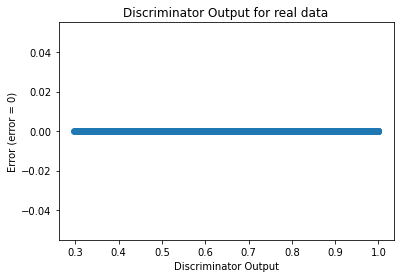

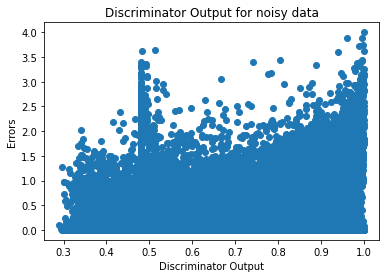

In [13]:
sanityChecks.discProbVsError(real_dataset,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [14]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], device='cuda:0', requires_grad=True)
